In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [171]:
from sklearn.datasets import load_breast_cancer
X,Y = load_breast_cancer(return_X_y=True)

In [172]:
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [173]:
def find_correlation(X):
  correlation_matrix=np.zeros((X.shape[1],X.shape[1]))
  mean_features=[X[:,j].sum(axis=0)/len(X) for j in range(X.shape[1])]
  # print(mean_features)
  
  def correlation_calculation_formula(vecX,vecY,X_mean,Y_mean):
    numerator=np.sum((np.array(vecX)-X_mean)*(np.array(vecY)-Y_mean))
    denominator=np.sqrt(np.sum((np.array(vecX)-X_mean)**2) * np.sum((np.array(vecY)-Y_mean)**2))
    correlation_coff=numerator/denominator
    return correlation_coff

  for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
      correlation_matrix[i][j]=correlation_calculation_formula(X[:,i],X[:,j],mean_features[i],mean_features[j])
  # print(correlation_matrix)
  return correlation_matrix 

corr_matrix=find_correlation(X)
  


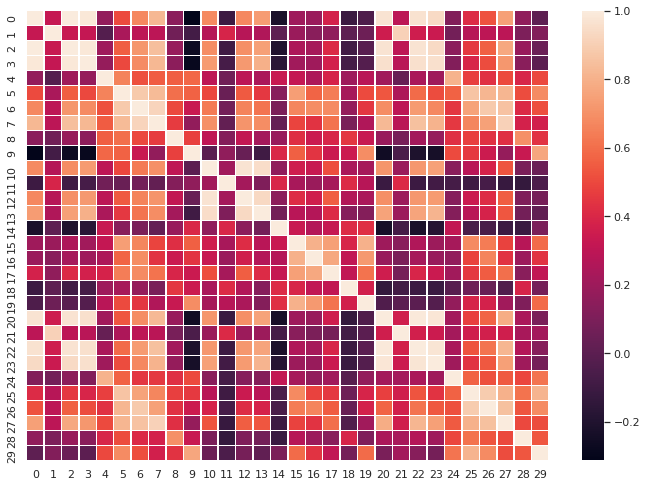

In [174]:
ax = sns.heatmap(corr_matrix , linewidth = 0.5 ,annot=False)#, cmap = 'autumn')

In [175]:
x1=np.array(X[:,0:2])
x2=np.array(X[:,4:20])
x3=np.array(X[:,21]).reshape(len(X),1)
x4=np.array(X[:,24:])
x_1=np.hstack((x1,x2))
x_1.shape
x_2=np.hstack((x_1,x3))
x_3=np.hstack((x_2,x4))
X=x_3

In [176]:
def normalize(X):

    m, n = X.shape  
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X



In [177]:
normalize(X)

array([[ 1.09706398, -2.07333501,  1.56846633, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241, -0.82696245, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  0.94221044, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 , -0.84048388, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.52576706, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -3.11208479, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
x=X_train
y=Y_train
print(x.shape)
print(y.shape)

(455, 25)
(455,)


In [199]:
# a=np.array([1,2])
# b=np.array([[1,2,3],[4,5,6]])
# print(a)
# print(b)
# # np.sum(b*a)
# t=np.zeros(3)
# for i in range(3):
#   t[i]=np.sum(a*b[:,i])
#   print(t[i])
# t

epoch: 0   loss: nan
epoch: 1   loss: nan
epoch: 2   loss: 2.9902196209523826
epoch: 3   loss: 1.3995722242442092
epoch: 4   loss: 1.0199052777616557
epoch: 5   loss: 0.9235771670703141
epoch: 6   loss: 0.8942603512429983
epoch: 7   loss: 0.8764458266777987
epoch: 8   loss: 0.86042402672202
epoch: 9   loss: 0.8447633365996973
epoch: 10   loss: 0.8293086866052011
epoch: 11   loss: 0.8140518698310953
epoch: 12   loss: 0.7989989410187738
epoch: 13   loss: 0.7841575108688545
epoch: 14   loss: 0.7695356665984646
epoch: 15   loss: 0.7551418955536434
epoch: 16   loss: 0.7409850897553589
epoch: 17   loss: 0.7270745529371625
epoch: 18   loss: 0.7134200012725769
epoch: 19   loss: 0.7000315553663434
[1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1
 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0
 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1
 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


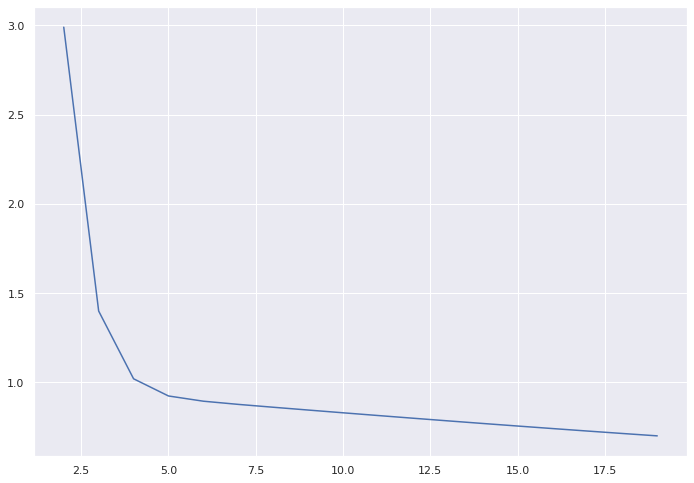

In [184]:
np.random.seed(47)
theta=[np.random.rand() for t in range(0,x.shape[1]+1)]
alpha = 0.01

def hypothesis_function(x,theta):

  hypothesis = theta[0] + np.sum((theta[1:] * x),axis=1)

  hypothesis = 1/(1+e**(-1*hypothesis))

  return hypothesis



def cost_function(x,y,hypothesis):

  cost = (-1/len(x))*np.sum((y*np.log(hypothesis)) + ((1-y)*np.log(1-hypothesis))) 

  return cost


def predict(hypothesis_func):
   
  prediction=[]

  for i in hypothesis_func:
    if i > 0.5:
      prediction.append(1)
    elif i <= 0.5:
      prediction.append(0)

  return np.array(prediction)



def logistic_regression_gradient_descent(x,y,theta,alpha):
  
  hypothesis=hypothesis_function(x,theta)
  
  theta[0] = theta[0] - alpha*(1/len(x))*(np.sum((hypothesis-y)*1))

  for j in range(0,x.shape[1]):
    theta[j+1] = theta[j+1] - alpha*(1/len(x))*(np.sum((hypothesis-y)*x[:,j]))

  return theta


# epoch 0
hypothesis=hypothesis_function(x,theta)
cost=cost_function(x,y,hypothesis)

print("epoch:",0," ","loss:",cost)

##

dic_theta=[]
dic_loss=[]
dic_hyp=[]

dic_theta.append(theta)
dic_loss.append(cost)
dic_hyp.append(hypothesis)


# hypothesis=hypothesis_function(x,theta)

for epoch in range(1,20):
  # hypothesis=hypothesis_function(x,theta)
  theta = logistic_regression_gradient_descent(x,y,theta,alpha)
  hypothesis = hypothesis_function(x,theta)
  cost = cost_function(x,y,hypothesis)


  print("epoch:",epoch," ","loss:",cost)

  dic_theta.append(theta)
  dic_loss.append(cost)
  dic_hyp.append(hypothesis)

predicted_classes = predict(dic_hyp[-1]) 

print(predicted_classes)

epochs=np.arange(0,20)
plt.plot(epochs,dic_loss)

In [186]:
y

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,

In [188]:
y_pred = predict(dic_hyp[-1])

In [192]:
c_sum=0
inc_sum=0
for i in range(len(y_pred)):
  if y_pred[i]==y[i]:
    c_sum+=1
  else:
    inc_sum+=1
print(c_sum)
print(inc_sum)

377
78


In [193]:
def training_accuracy(y, y_pred):
    train_accuracy = np.sum(y == y_pred) / len(y)
    return train_accuracy


In [194]:
training_accuracy(y,y_pred)

0.8285714285714286

# Testing phase

In [195]:
test_hypothesis=hypothesis_function(X_test,dic_theta[-1])
y_test_pred = predict(test_hypothesis)


In [196]:
def testing_accuracy(y_test, y_test_pred):
    test_accuracy = np.sum(y_test == y_test_pred) / len(y_test)
    return test_accuracy


In [198]:
testing_accuracy(Y_test,y_test_pred)

0.8421052631578947